In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import datetime

In [3]:
!dir inputs

 Volume in drive D has no label.
 Volume Serial Number is F6A2-5568

 Directory of D:\PythonTraining\Trading\other_fx\inputs

2021/04/24  12:46    <DIR>          .
2021/04/24  12:46    <DIR>          ..
2021/04/18  16:22         2,573,622 EURGBP_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,576,106 EURJPY_M10_202003020000_202104162350.csv
2021/04/18  16:21         2,571,608 EURUSD_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,585,572 GBPJPY_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,578,380 GBPUSD_M10_202003020000_202104162350.csv
2021/04/18  15:32    <DIR>          m1
2021/04/18  16:23    <DIR>          m5
2021/04/19  21:36         2,577,705 USDJPY_M10.csv
2021/04/18  16:22         2,571,975 USDJPY_M10_202003020000_202104162350.csv
2021/04/24  12:46         1,733,783 USDJPY_M15.csv
               8 File(s)     19,768,751 bytes
               4 Dir(s)  466,099,838,976 bytes free


In [4]:
dataset = pd.read_csv('inputs/USDJPY_M15.csv', sep='\t')
dataset

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3
...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0


In [5]:
df = pd.DataFrame()

df['<CLOSE>'] = dataset['<CLOSE>']
# df['<OPEN>'] = dataset['<OPEN>'].shift(1).fillna(0)
# df['<HIGH>'] = dataset['<HIGH>'].shift(1).fillna(0)
# df['<LOW>'] = dataset['<LOW>'].shift(1).fillna(0)
# df['<TICKVOL>'] = dataset['<TICKVOL>'].shift(1).fillna(0)
# df['<VOL>'] = dataset['<VOL>'].shift(1).fillna(0)
for i in range(1, 13):
    df['shift%s'%i] = dataset['<CLOSE>'].shift(i)

df['SMA20'] = df['shift1'].shift(1).rolling(20).mean().fillna(0)
df['SMA50'] = df['shift1'].shift(1).rolling(50).mean().fillna(0)
df['SMA100'] = df['shift1'].shift(1).rolling(100).mean().fillna(0)


In [6]:
df

,<CLOSE>,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,SMA20,SMA50,SMA100
0,107.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
1,107.717,107.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
2,107.640,107.717,107.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
3,107.375,107.640,107.717,107.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
4,107.498,107.375,107.640,107.717,107.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.945,107.945,107.975,107.96685,107.88208,107.95237
28336,107.900,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.945,107.945,107.96050,107.88168,107.94715
28337,107.887,107.900,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.945,107.95090,107.88038,107.94227
28338,107.888,107.887,107.900,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.94230,107.88056,107.93724


In [7]:
# df[1439:]
X = df[1439:].drop(['<CLOSE>'], axis=1)
y =  df[1439:]['<CLOSE>']

In [8]:
X

,shift1,shift2,shift3,shift4,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,SMA20,SMA50,SMA100
1439,110.749,110.833,110.960,111.069,110.983,111.181,110.836,110.854,111.070,111.323,111.219,111.076,111.10950,110.82940,110.57841
1440,110.388,110.749,110.833,110.960,111.069,110.983,111.181,110.836,110.854,111.070,111.323,111.219,111.09470,110.84100,110.57668
1441,110.361,110.388,110.749,110.833,110.960,111.069,110.983,111.181,110.836,110.854,111.070,111.323,111.06710,110.85098,110.57222
1442,110.476,110.361,110.388,110.749,110.833,110.960,111.069,110.983,111.181,110.836,110.854,111.070,111.02885,110.85970,110.56816
1443,110.671,110.476,110.361,110.388,110.749,110.833,110.960,111.069,110.983,111.181,110.836,110.854,110.99355,110.86990,110.56386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.945,107.945,107.975,107.96685,107.88208,107.95237
28336,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.945,107.945,107.96050,107.88168,107.94715
28337,107.900,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.945,107.95090,107.88038,107.94227
28338,107.887,107.900,107.893,107.878,107.907,107.930,107.927,107.927,107.934,107.958,107.944,107.952,107.94230,107.88056,107.93724


# Make Predict model by LightGBM

In [9]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [10]:
X.shape

(26901, 15)

In [11]:
y.shape

(26901,)

In [12]:
X.columns.tolist()

['shift1',
 'shift2',
 'shift3',
 'shift4',
 'shift5',
 'shift6',
 'shift7',
 'shift8',
 'shift9',
 'shift10',
 'shift11',
 'shift12',
 'SMA20',
 'SMA50',
 'SMA100']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [14]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [15]:
# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'rmse'},
        'num_leaves':78,
        'drop_rate':0.05,
        'learning_rate':0.005,
        'seed':0,
        'verbose':0,
        'device': 'cpu',
        'max_depth': -1, 
        'random_state': 0
}

In [16]:
evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
Training until validation scores don't improve for 1000 rounds
[100]	Train's rmse: 0.687342	Valid's rmse: 1.04216
[200]	Train's rmse: 0.418359	Valid's rmse: 0.632328
[300]	Train's rmse: 0.256509	Valid's rmse: 0.385382
[400]	Train's rmse: 0.160115	Valid's rmse: 0.237577
[500]	Train's rmse: 0.103961	Valid's rmse: 0.155057
[600]	Train's rmse: 0.0727314	Valid's rmse: 0.112068
[700]	Train's rmse: 0.0566751	Valid's rmse: 0.0901324
[800]	Train's rmse: 0.0490122	Valid's rmse: 0.0799963
[900]	Train's rmse: 0.0454238	Valid's rmse: 0.0747948
[1000]	Train's rmse: 0.04359

In [17]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [18]:
y_pred

array([105.53719238, 105.53097166, 105.54053872, ..., 107.90665174,
       107.87110774, 107.87320234])

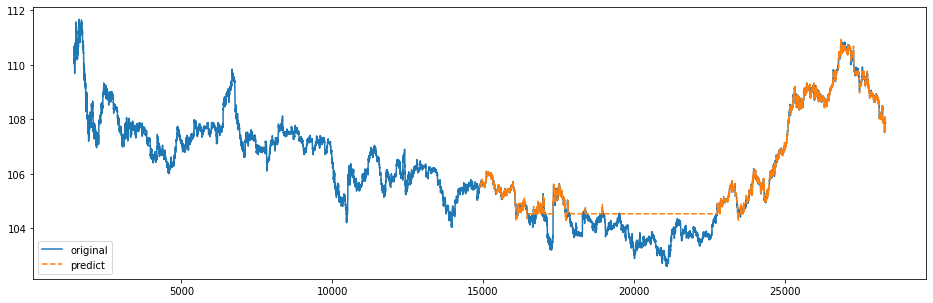

In [19]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

In [20]:
len(y_val)

2690

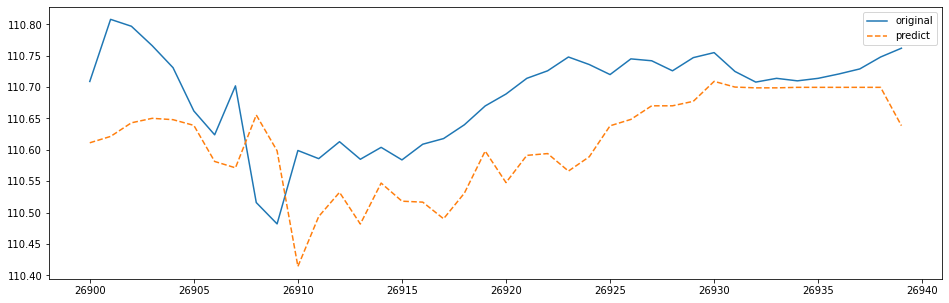

In [21]:
plt.figure(figsize=(16,5))
plt.plot(y[-1440:-1400], label='original')
plt.plot(y_[-1440:-1400], '--', label='predict')
plt.legend()

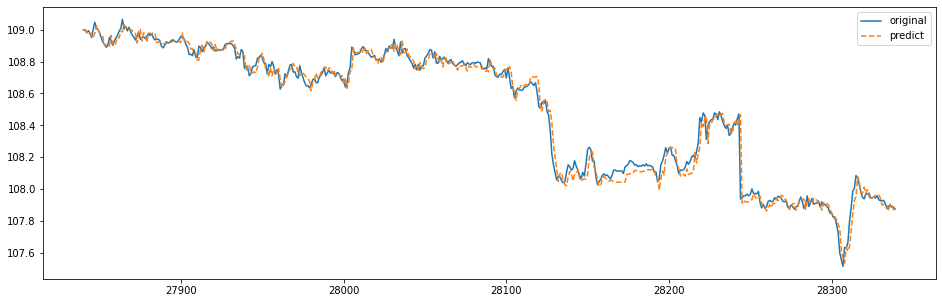

In [22]:
plt.figure(figsize=(16,5))
plt.plot(y[-500:], label='original')
plt.plot(y_[-500:], '--', label='predict')
plt.legend()

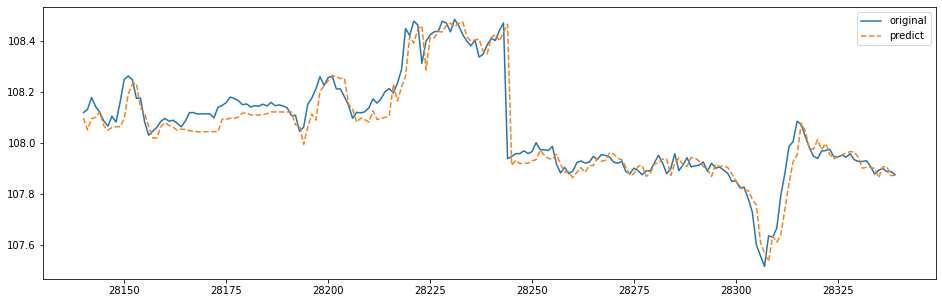

In [23]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:], label='original')
plt.plot(y_[-200:], '--', label='predict')
plt.legend()

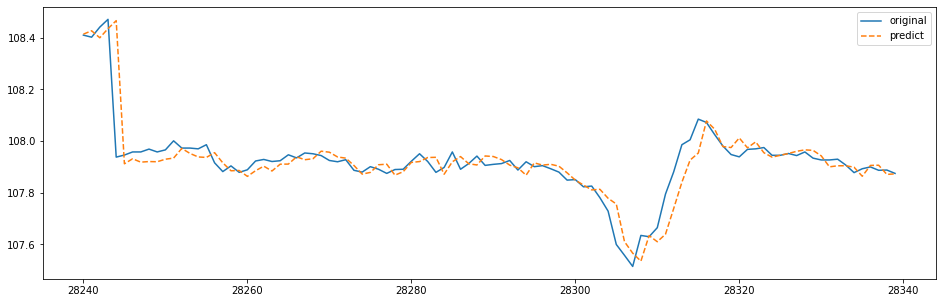

In [24]:
plt.figure(figsize=(16,5))
plt.plot(y[-100:], label='original')
plt.plot(y_[-100:], '--', label='predict')
plt.legend()

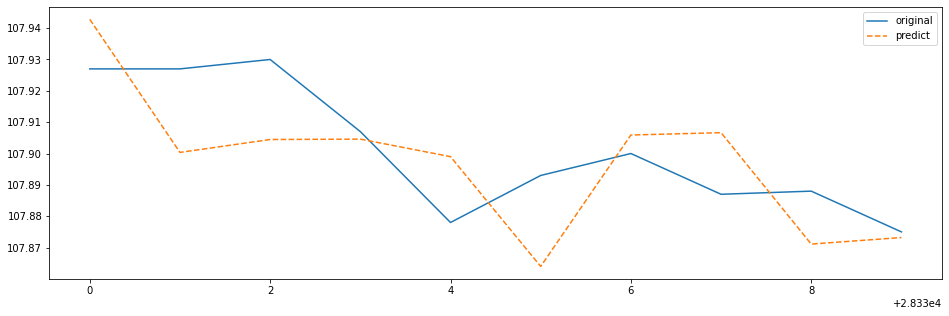

In [25]:
plt.figure(figsize=(16,5))
plt.plot(y[-10:], label='original')
plt.plot(y_[-10:], '--', label='predict')
plt.legend()

# make model

In [26]:
import pickle

filename='model.pkl'
pickle.dump(gbm, open(filename, 'wb'))